In [3]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

#data cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
#filter for data analyst jobs in the US
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

Text(0, 0.5, 'Number of Jobs')

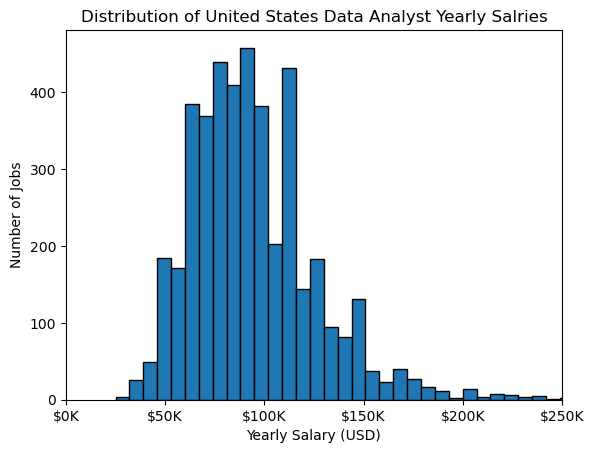

In [14]:
df_DA_US["salary_year_avg"].plot(kind="hist", bins=50, edgecolor="black")
plt.xlim(0, 250000)

ax = plt.gca()
# Format y-axis to show in $K
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.title("Distribution of United States Data Analyst Yearly Salries")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("Number of Jobs")